# STEP #0: PROBLEM STATEMENT  


<p align="center">
  <img src="https://storage.googleapis.com/kaggle-datasets-images/2243/3791/9384af51de8baa77f6320901f53bd26b/dataset-cover.png" />
  Image source: https://www.kaggle.com/
</p>



- Fashion training set consists of 70,000 images divided into 60,000 training and 10,000 testing samples. Dataset sample consists of 28x28 grayscale image, associated with a label from 10 classes. 

- The 10 classes are as follows:  
  - 0 => T-shirt/top
  - 1 => Trouser
  - 2 => Pullover
  - 3 => Dress
  - 4 => Coat
  - 5 => Sandal
  - 6 => Shirt
  - 7 => Sneaker
  - 8 => Bag
  - 9 => Ankle boot

- Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. 


# STEP #1: IMPORT LIBRARIES

In [1]:
!pip install tensorflow-gpu==2.9.2

import tensorflow as tf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# STEP #2: LOAD DATASET

In [2]:
# dataframes for both training and testing datasets 
train_dataset = pd.read_csv('fashion-mnist_test.csv',sep=',')
test_dataset = pd.read_csv('fashion-mnist_train.csv', sep=',')

In [3]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# STEP #3: DATA VISUALIZATION

In [4]:
train_dataset.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train_dataset.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9999,1,0,0,0,0,0,0,0,140,119,...,111,95,75,44,1,0,0,0,0,0


In [6]:
test_dataset.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
test_dataset.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
train_dataset.shape

(10000, 785)

In [9]:
# Create training and testing arrays
training = np.array(train_dataset, dtype='float32')
testing = np.array(test_dataset, dtype='float32')

In [10]:
training.shape

(10000, 785)

In [11]:
training

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 1., 0.],
       [8., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [12]:
testing

array([[2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.]], dtype=float32)

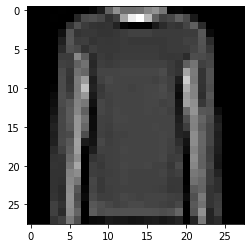

In [13]:
# Let's view some images!
i = random.randint(0,10000) # select any random index from 1 to 60,000
plt.imshow(training[i,1:].reshape((28,28))) # reshape and plot the image

plt.imshow(training[i,1:].reshape((28,28)), cmap='gray') # reshape and plot the image


# Remember the 10 classes decoding is as follows:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot

In [14]:
label = training[i,0]
label


2.0

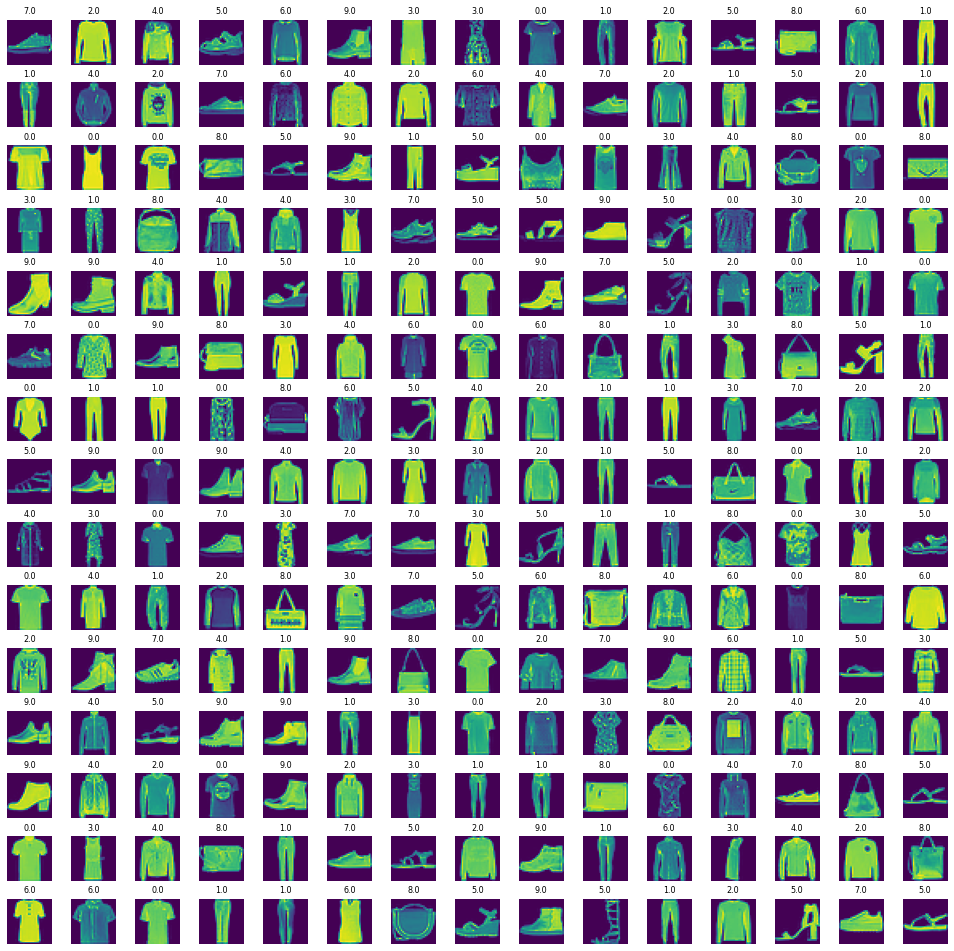

In [15]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 15
L_grid = 15

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize=(17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(training) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid*L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow( training[index,1:].reshape((28,28)) )
    axes[i].set_title(training[index,0], fontsize=8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

# Remember the 10 classes decoding is as follows:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot

# STEP#4: BUILD AND TRAIN A DEEP LEARNING MODEL

In [16]:
# Prepare the training and testing dataset 
X_train = training[:,1:]/255
y_train = training[:,0]

X_test = testing[:,1:]/255
y_test = testing[:,0]

In [17]:
X_train.shape

(10000, 784)

In [18]:
y_train.shape

(10000,)

In [19]:
# * : unpack the tuple
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))

In [20]:
X_train.shape

(10000, 28, 28, 1)

In [21]:
X_test.shape

(60000, 28, 28, 1)

In [22]:
from tensorflow.keras import datasets, layers, models

cnn = models.Sequential()

cnn.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28,28,1)))
cnn.add(layers.MaxPooling2D(2,2))

cnn.add(layers.Conv2D(64, (3,3), activation = 'relu'))
cnn.add(layers.MaxPooling2D(2,2))

cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))

cnn.add(layers.Flatten())

cnn.add(layers.Dense(64, activation = 'relu'))

cnn.add(layers.Dense(10, activation = 'softmax'))
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [23]:
cnn.compile(loss ='sparse_categorical_crossentropy', optimizer = 'Adam', metrics =['accuracy'])

In [24]:
epochs = 150

history = cnn.fit(X_train, y_train, batch_size=512, epochs=epochs, verbose=1)


Epoch 1/150
20/20 [==============================] - 5s 28ms/step - loss: 1.7231 - accuracy: 0.4175
Epoch 2/150
20/20 [==============================] - 0s 15ms/step - loss: 0.8649 - accuracy: 0.6764
Epoch 3/150
20/20 [==============================] - 0s 14ms/step - loss: 0.7289 - accuracy: 0.7285
Epoch 4/150
20/20 [==============================] - 0s 17ms/step - loss: 0.6599 - accuracy: 0.7463
Epoch 5/150
20/20 [==============================] - 0s 18ms/step - loss: 0.6134 - accuracy: 0.7692
Epoch 6/150
20/20 [==============================] - 0s 15ms/step - loss: 0.5605 - accuracy: 0.7904
Epoch 7/150
20/20 [==============================] - 0s 15ms/step - loss: 0.5335 - accuracy: 0.8023
Epoch 8/150
20/20 [==============================] - 0s 13ms/step - loss: 0.5068 - accuracy: 0.8133
Epoch 9/150
20/20 [==============================] - 0s 14ms/step - loss: 0.4863 - accuracy: 0.8186
Epoch 10/150
20/20 [==============================] - 0s 15ms/step - loss: 0.4669 - accuracy: 0.8270

# STEP #5: EVALUATE THE MODEL

In [25]:
evaluation = cnn.evaluate(X_test, y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

1875/1875 [==============================] - 5s 2ms/step - loss: 0.7970 - accuracy: 0.8788
Test Accuracy : 0.879


In [26]:
# get the predictions for the test data
predicted = cnn.predict(X_test)
predicted_classes = predicted.argmax(axis=-1)

1875/1875 [==============================] - 4s 2ms/step


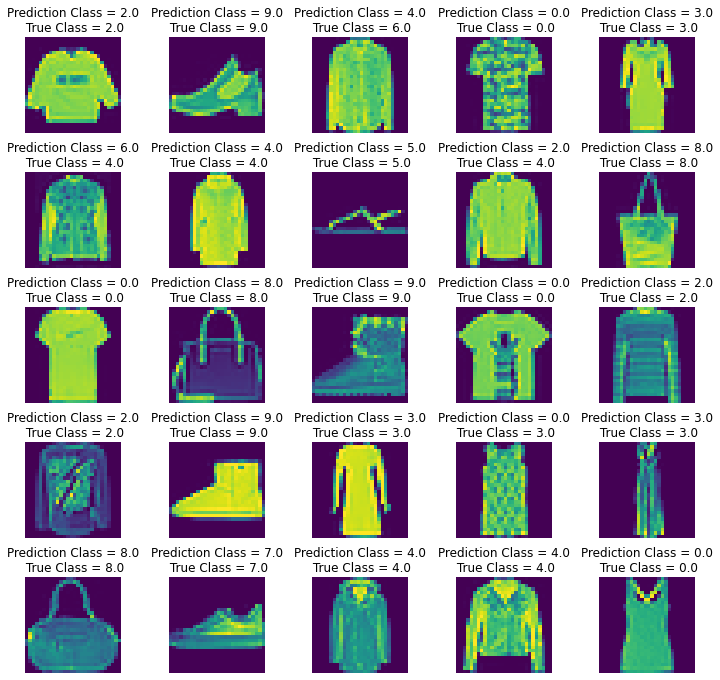

In [27]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0, L*W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)


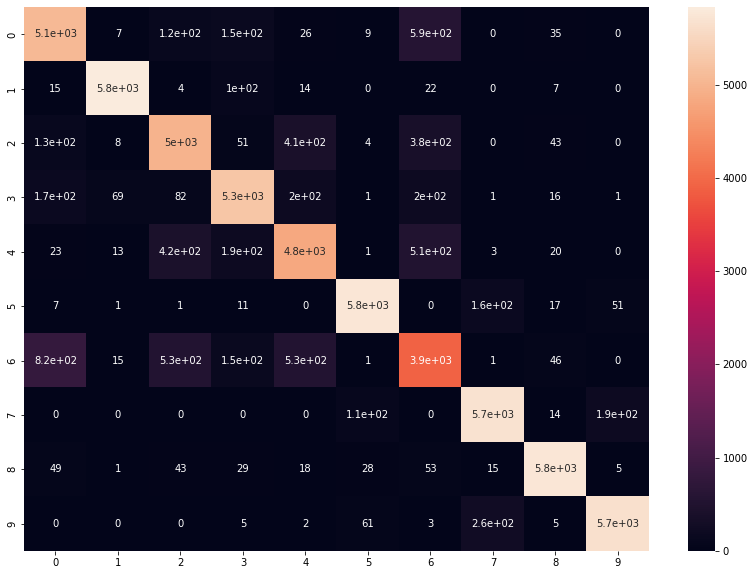

In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)
# Sum the diagonal element to get the total true correct values

In [29]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.81      0.84      0.82      6000
     Class 1       0.98      0.97      0.98      6000
     Class 2       0.80      0.83      0.82      6000
     Class 3       0.88      0.88      0.88      6000
     Class 4       0.80      0.80      0.80      6000
     Class 5       0.96      0.96      0.96      6000
     Class 6       0.69      0.65      0.67      6000
     Class 7       0.93      0.95      0.94      6000
     Class 8       0.97      0.96      0.96      6000
     Class 9       0.96      0.94      0.95      6000

    accuracy                           0.88     60000
   macro avg       0.88      0.88      0.88     60000
weighted avg       0.88      0.88      0.88     60000

